## Binary Image Classification on Fashion MNIST with Tensorflow-Quantum and Cirq

#### About dataset and QML

We shall perform QML on Fashion MNIST dataset which contains 10 labels using TensorFLow Quantum and Cirq.Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset to benchmark machine learning algorithms, as it shares the same image size and the structure of training and testing splits.

[TensorFlow-Quantum](https://www.tensorflow.org/quantum) is a great place to start learning QML and get into this amazing field. TensorFlow Quantum (TFQ) is a quantum machine learning library for rapid prototyping of hybrid quantum-classical ML models.TensorFlow Quantum focuses on quantum data and building hybrid quantum-classical models. It integrates quantum computing algorithms and logic designed in Cirq, and provides quantum computing primitives compatible with existing TensorFlow APIs, along with high-performance quantum circuit simulators.

[Cirq](https://quantumai.google/cirq) is a Python software library for writing, manipulating, and optimizing quantum circuits, and then running them on quantum computers and quantum simulators. Cirq provides useful abstractions for dealing with today’s noisy intermediate-scale quantum computers, where details of the hardware are vital to achieving state-of-the-art results.


We will modify the Fashion MNIST dataset by making classification on only two classes - T-shirt and Shirt. The reason to choose these classes is that they are similar to each other and therefore, it ascertains that the classification problem doesn't become very easy. The image shape in the provided dataset is (28,28), but we need to downscale the images to classify them using QML due to the hardware restrictions. We will downscale the images so that they have the shape (4,4).

Number of Images in the Train Dataset - **10200**

Number of Images in the Validation Dataset - **1800**

Number of Images in the Test Dataset - **2000**

Size of each Image - **(2,2)**

Type of Image - **Grayscale Image**

Number of Labels - **2**

| **Label** | **Description**   |
|------|------|
|   **0**  | **Tshirt/top**|
|   **6**  | **Shirt** |  

Checkout the Dataset [Here](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

#### Installing required packages

In [ ]:
from IPython.display import clear_output
!pip install -q tensorflow==2.3.1

     |████████████████████████████████| 320.4 MB 22 kB/s 
     |████████████████████████████████| 2.9 MB 12.9 MB/s 
     |████████████████████████████████| 459 kB 15.5 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
plotnine 0.8.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
jax 0.3.23 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
cmdstanpy 1.0.7 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.


In [ ]:
#Installing Tensorflow Quantum
!pip install -q tensorflow_quantum==0.4.0

     |████████████████████████████████| 5.9 MB 5.3 MB/s 
     |████████████████████████████████| 5.6 MB 44.8 MB/s 
     |████████████████████████████████| 1.6 MB 44.6 MB/s 
     |████████████████████████████████| 1.3 MB 46.8 MB/s 
     |████████████████████████████████| 211 kB 39.2 MB/s 
     |████████████████████████████████| 211 kB 36.5 MB/s 
     |████████████████████████████████| 211 kB 33.4 MB/s 
     |████████████████████████████████| 241 kB 55.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.10.0 requires protobuf<4,>=3.13, but you have protobuf 3.12.4 which is incompatible.


In [ ]:
#Installing Cirq
!pip install cirq==0.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing dataset and required packages

In [ ]:
import tensorflow as tf
#Data Preprocessing tools
import numpy as np
from sklearn.model_selection import train_test_split
#QML tools
import tensorflow_quantum as tfq
import cirq
import sympy

# Visualization Tools
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt

In [ ]:
#Lets print the version of cirq and tfq that we will use
print("We are using the TensorFlow-Quantum version {}".format(tfq.__version__))
print("We are using the Cirq version {}".format(cirq.__version__))

We are using the TensorFlow-Quantum version 0.4.0
We are using the Cirq version 0.9.1


In [ ]:
#importing the Fashion MNIST dataset from keras
from tensorflow.keras.datasets import fashion_mnist as dataset

In [ ]:
(X_train , y_train),(X_test,y_test) = dataset.load_data()

In [ ]:
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (60000, 28, 28)
The shape of the y_train is (60000,)
The shape of the X_test is (10000, 28, 28)
The shape of the y_test is (10000,)


**X_train has 60,000 images,each of size 28x28**

### Data Processing

In [ ]:
def filter_data(x, y):           # Function to filter the data and extract only images of labels '0' and '6'
  #filter the data using labels  # 0 = 'T-shirt' and 6 = 'Shirt'
  keep = (y == 0) | (y == 6)
  x, y = x[keep], y[keep]

  # convert labels to boolean
  # y = True if y==0
  # y = False if y==6
  y = y == 0
  return x,y

In [ ]:
#Filter the train set
X_train, y_train = filter_data(X_train, y_train)

#Filter the test_set
X_test, y_test = filter_data(X_test, y_test)

In [ ]:
#shapes of train and test data after filtering
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (12000, 28, 28)
The shape of the y_train is (12000,)
The shape of the X_test is (2000, 28, 28)
The shape of the y_test is (2000,)


The First Image has the label True


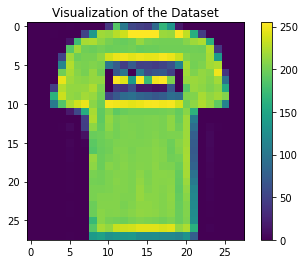

In [ ]:
#Let's have a look at the first image from our X_train and the 
# corresponding label from y_train
print("The First Image has the label {}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

**_Here the first label is True because label is True if (y = y == 0) is True.Hence y is '0' and the image is 'T-shirt'_**

From the colorbar in the above visualization, it is clear that we have grayscale images in the dataset and hence their values range from 0 to 255. However, we would like to scale these pixel values in our dataset so that the values range from 0 to 1. This will help us to converge our CNN training faster

In [ ]:
#Normalizing the train and test image data
X_train = X_train/255.0
X_test = X_test/ 255.0

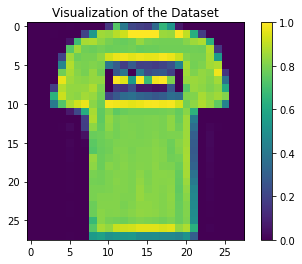

In [ ]:
#Let's see if we have successfully normalized the datasets
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

In [ ]:
#Reshaping images in the dataset
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))       # Here '1' rep resents no.of channels... for Grey scale images it's '1',for RGB scale images it's '3'
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

In [ ]:
# Downscaling the images (for better feeding to the quantum computer )
X_train = tf.image.resize(X_train, (2,2)).numpy()
X_test = tf.image.resize(X_test, (2,2)).numpy()

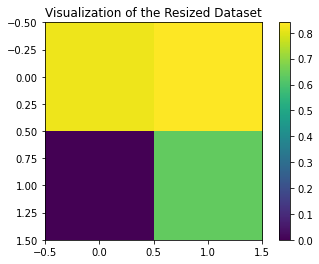

In [ ]:
#Let's again have a look at the first image from our resized X_train
plt.imshow(X_train[0,:,:,0])
plt.colorbar()
plt.title('Visualization of the Resized Dataset')
plt.show()

In [ ]:
#Splitting the training dataset into train and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.15, random_state=0)

In [ ]:
print("The shape of the X_train is {}".format(X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_valid is {}".format(X_valid.shape))
print("The shape of the y_valid is {}".format(y_valid.shape))

The shape of the X_train is (10200, 2, 2, 1)
The shape of the y_train is (10200,)
The shape of the X_valid is (1800, 2, 2, 1)
The shape of the y_valid is (1800,)


### Data Encoding
Steps involved in Data Encoding:
- Processing pixel values for binary encoding
- Converting Cirq Circuits to tfq tensors  

**Processing pixel values for binary encoding**

In [ ]:
# FLattening the images
X_train = X_train.reshape(X_train.shape[0], *(1,4,1))
X_valid = X_valid.reshape(X_valid.shape[0], *(1,4,1))
X_test = X_test.reshape(X_test.shape[0], *(1,4,1))

In [ ]:
print(X_train[0]) #The first example

[[[0.8421569]
  [0.8156863]
  [0.       ]
  [0.5294118]]]


In [ ]:
def binary_encode(X,threshold=0.5):
  encoded_images = list()
  for image in X:
    # pixel value is 1 if it's greater than threshold or else zero
    encoded_image = [1 if j>threshold else 0 for j in image[0]]
    encoded_images.append(encoded_image)
  return np.array(encoded_images)

'binary_encode()' encodes the given dataset to use binary encoding

Parameters:
X(array) : Image data to be processed for encoding
threshold(float): Threshold for binary encoding, 0.5 by default

Returns:
encoded_images(array): Binary encoded Image Data

In [ ]:
X_train = binary_encode(X_train)

In [ ]:
print(X_train[0])

[1 1 0 1]


In [ ]:
print("The shape of the X_train is {}".format(X_train.shape))

The shape of the X_train is (10200, 4)


In [ ]:
def create_circuit_from_image(encoded_image):
  """
  Returns a circuit for given encoded image

  Parameters:
  encoded_image (array): Encoded Image

  Returns:
  circuit (cirq.Circuit object): cirq circuit
  """
  qubits = cirq.GridQubit.rect(2,2)
  circuit = cirq.Circuit()
  for i, pixel in enumerate(encoded_image):
    if pixel:
      circuit.append(cirq.X(qubits[i]))
  return circuit

In [ ]:
X_train = [create_circuit_from_image(encoded_image) for encoded_image in X_train]

In [ ]:
# Let's have a look at the circuit for the first image
print(X_train[0])

(0, 0): ───X───

(0, 1): ───X───

(1, 1): ───X───


Recall that the values for the first image were 0,0,1,1. This implies that we should apply X or NOT gate the last two qubuts since all the qubits are intially in the 0 states. Applying a X gate will change this state from zero to one. Therefore, we shall apply X Gate on the last two qubits. We have initialized the four qubits in a rectangular grid. Therefore, the initialized qubits are (0,0), (0,1), (1,0) and (1,1). In the above circuit diagram, note that we have a X gate on the qubits (1,0) and (1,1) which are the last two qubits. Hence, we have successfully created circuit for our image.

**Converting Cirq Circuits to tfq Tensors**

In [ ]:
X_train_tfq = tfq.convert_to_tensor(X_train)

#### Processing X_valid and X_test

In [ ]:
X_valid = binary_encode(X_valid)
X_test = binary_encode(X_test)

In [ ]:
X_valid = [create_circuit_from_image(encoded_image) for encoded_image in X_valid]
X_test = [create_circuit_from_image(encoded_image) for encoded_image in X_test]

In [ ]:
X_valid_tfq = tfq.convert_to_tensor(X_valid)
X_test_tfq = tfq.convert_to_tensor(X_test)

### Quantum Neural Network

#### Build the QNN
Building the Quantum Neural Network involves two steps
- Build a class that adds gates layer by layer
- Define the QNN using the class from the above step

In [ ]:
class QNN():
    def __init__(self, data_qubits, readout):
      self.data_qubits = data_qubits
      self.readout = readout

    def add_singleQubit_gate(self,circuit, gate, qubit_index):
      """
      Adds single qubit gate to the circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      qubits(list): index of qubits to apply the gate 
      Returns:
      None
      """
      for index in qubit_index:
        circuit.append(gate(self.data_qubits[index]))

    def add_twoQubit_gate(self,circuit, gate, qubit_index):
      """
      Adds two qubit gate to the circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      qubits(list): index of qubits to apply the gate
      Returns:
      None
      """
      if len(qubit_index)!=2:
        raise Exception("The length of the list of indices passed for two qubit \
        gate operations must be equal to two")
      circuit.append(gate(self.data_qubits[qubit_index[0]], self.data_qubits[qubit_index[1]]))

    def add_layer(self, circuit, gate, symbol_gate):
      """
      Adds New Gates/Layers to the Circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      symbol_gate(string): symbol for the gate
      Returns:
      None
      """
      for i, qubit in enumerate(self.data_qubits):
        symbol = sympy.Symbol(symbol_gate+ '-' + str(i))
        circuit.append(gate(qubit, self.readout)**symbol)


In [ ]:
def create_qnn():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(2,2)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()

    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    qnn = QNN(
        data_qubits = data_qubits,
        readout=readout)
    
    """
    # Though we don't use single and double Qubit Gates in our Circuit, we provide 
    # the methods "add_singleQubit_gate" and "add_twoQubit_gate" for our Class QNN
    # that can be used to add Single and Double Qubit Gates respectively.
    # An exmaple is shown below:
    

    #Add Hadamard Gates
    qnn.add_singleQubit_gate(circuit, cirq.H, [0,1,2,3])
    """

    #Add CNOT gates
    qnn.add_twoQubit_gate(circuit, cirq.CNOT, [0, 1])
    qnn.add_twoQubit_gate(circuit, cirq.CNOT, [2, 3])
    

    # Add the ising coupling XX gate
    qnn.add_layer(circuit, cirq.XX, "xx")
    qnn.add_layer(circuit, cirq.ZZ, "zz")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

**Ising Coupling Gate XX**

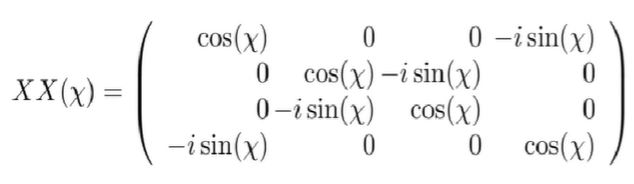

In [ ]:
qmodel, model_readout = create_qnn()

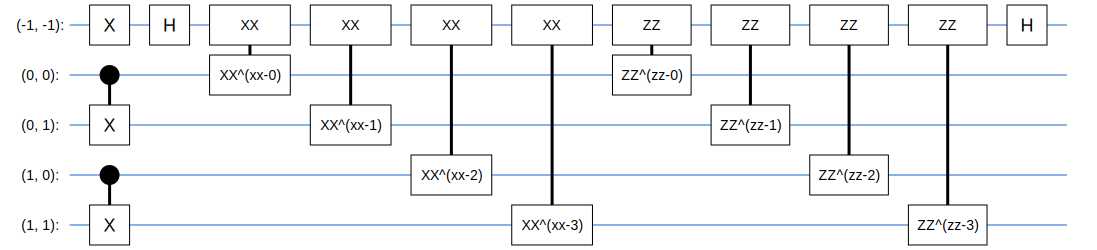

In [ ]:
#Qauntum Circuit that will perform the classification
SVGCircuit(qmodel)

In [ ]:
model = tf.keras.Sequential([
                             
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),

    
    # The PQC stands for Paramaterized Quantum Circuit
    # This returns the expectation value
    tfq.layers.PQC(qmodel, model_readout),
])

**Hinge Loss**

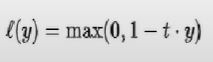

In [ ]:
# To use Hinge Loss, we convert the labels to 1 and -1
y_train_h = np.array([1 if i==1 else -1 for i in y_train ])
y_valid_h = np.array([1 if i==1 else -1 for i in y_valid ])
y_test_h = np.array([1 if i==1 else -1 for i in y_test ])

In [ ]:
# Let's have a look at the first label from the training dataset
print(y_train_h[0])

1


In [ ]:
# Custom Hinge Accuracy
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

#### Train the Qnn

In [ ]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[hinge_accuracy])

In [ ]:
qnn_history = model.fit(
      X_train_tfq, y_train_h,
      batch_size=64,
      epochs=10,
      verbose=1,
      validation_data=(X_valid_tfq, y_valid_h))

Epoch 1/10
160/160 [==============================] - 7s 43ms/step - loss: 0.9573 - hinge_accuracy: 0.5355 - val_loss: 0.8824 - val_hinge_accuracy: 0.5673
Epoch 2/10
160/160 [==============================] - 7s 46ms/step - loss: 0.8418 - hinge_accuracy: 0.5749 - val_loss: 0.8408 - val_hinge_accuracy: 0.5673
Epoch 3/10
160/160 [==============================] - 7s 43ms/step - loss: 0.8102 - hinge_accuracy: 0.5756 - val_loss: 0.8173 - val_hinge_accuracy: 0.6051
Epoch 4/10
160/160 [==============================] - 11s 67ms/step - loss: 0.7780 - hinge_accuracy: 0.6277 - val_loss: 0.7924 - val_hinge_accuracy: 0.6142
Epoch 5/10
160/160 [==============================] - 7s 41ms/step - loss: 0.7514 - hinge_accuracy: 0.6325 - val_loss: 0.7790 - val_hinge_accuracy: 0.6105
Epoch 6/10
160/160 [==============================] - 6s 39ms/step - loss: 0.7383 - hinge_accuracy: 0.6334 - val_loss: 0.7744 - val_hinge_accuracy: 0.6105
Epoch 7/10
160/160 [==============================] - 6s 40ms/step - 

In [ ]:
model.evaluate(X_test_tfq, y_test_h)

63/63 [==============================] - 1s 10ms/step - loss: 0.7059 - hinge_accuracy: 0.6473


[0.7059072256088257, 0.6473214030265808]

### Results

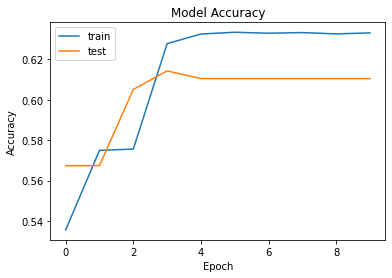

In [ ]:
# Visualize Accuracy
plt.plot(qnn_history.history['hinge_accuracy'])
plt.plot(qnn_history.history['val_hinge_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc="best")
plt.show()

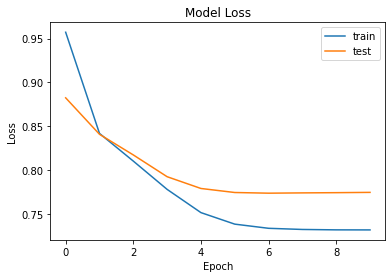

In [ ]:
# Visualize Loss
plt.plot(qnn_history.history['loss'])
plt.plot(qnn_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc="best")
plt.show()

### Saving The Model Weights

In [ ]:
#Saving the weights
model.save_weights('/content/sample_data/QModelWeights')

### Reference

- [https://www.tensorflow.org/quantum/tutorials/mnist](https://www.tensorflow.org/quantum/tutorials/mnist)
- [https://quantumai.google/cirq/tutorials](https://quantumai.google/cirq/tutorials)